In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
#看要秀哪一種資料
app_train.select_dtypes(include=['float64']).apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

Text(0.5, 0, 'AMT_INCOME_TOTAL')

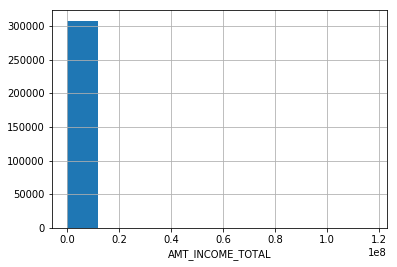

In [6]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

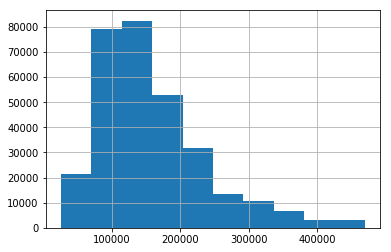

In [13]:
#先過濾異常大的值
app_train.loc[app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()

In [7]:
df = pd.DataFrame(app_train['AMT_INCOME_TOTAL'])
df.loc[0:10]

,AMT_INCOME_TOTAL
0,202500.0
1,270000.0
2,67500.0
3,135000.0
4,121500.0
5,99000.0
6,171000.0
7,360000.0
8,112500.0
9,135000.0


In [8]:
#df['AMT_INCOME_TOTAL'].sum()
df[0:10].describe()

,AMT_INCOME_TOTAL
count,10.000000
mean,167400.000000
std,88660.024814
min,67500.000000
25%,114750.000000
50%,135000.000000
75%,194625.000000
max,360000.000000


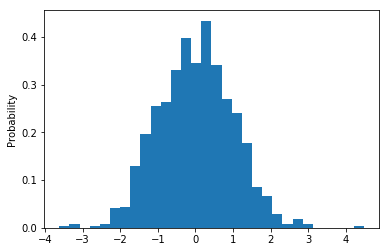

In [9]:
#範例
x = np.random.normal(size = 1000)
#bins 共要有幾條bar
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

    matplotlib.pyplot.hist(  
    x, bins=10, range=None, normed=False,   
    weights=None, cumulative=False, bottom=None,   
    histtype=u'bar', align=u'mid', orientation=u'vertical',   
    rwidth=None, log=False, color=None, label=None, stacked=False,   
    hold=None, **kwargs)  
    
    https://www.cnblogs.com/python-life/articles/6084059.html
    https://realpython.com/python-histograms/

Text(0.5, 1.0, 'Histogram')

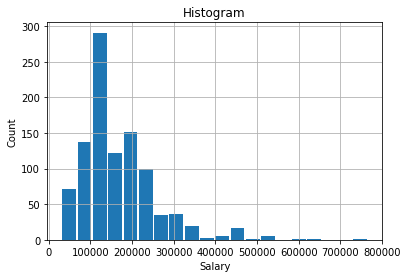

In [10]:
df = pd.DataFrame(app_train['AMT_INCOME_TOTAL'])
df.loc[0:1000].hist(bins=20, rwidth=0.9) #畫直方圖
plt.ylabel('Count')
plt.xlabel('Salary')
plt.title('Histogram')
#plt.hist(df[0:10], density=True, bins=30)
#plt.show()

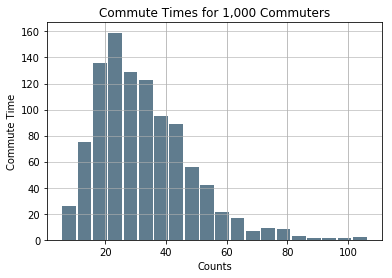

In [11]:
#範例
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)